In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from keras.models import Sequential 
from keras.layers import LSTM, Dropout, Dense, Activation
from keras.callbacks import TensorBoard, ModelCheckpoint, ReduceLROnPlateau 
import datetime

In [3]:
data = pd.read_csv('/content/Dataset/eth.csv')
data.head()

,Date,Open,High,Low,Close,Volume,Market Cap
0,31.Oct.17,307.38,310.55,305.88,305.88,"369,583,008.00","29,331,517,440.00"
1,1.Nov.17,305.76,306.40,290.58,291.69,"553,864,000.00","29,183,592,448.00"
2,2.Nov.17,290.73,293.91,281.17,287.43,"904,900,992.00","27,754,237,952.00"
3,3.Nov.17,288.50,308.31,287.69,305.71,"646,339,968.00","27,547,410,432.00"
4,4.Nov.17,305.48,305.48,295.80,300.47,"416,479,008.00","29,175,347,200.00"


In [4]:
high_prices = data['High'].values 
low_prices = data['Low'].values 
mid_prices = (high_prices + low_prices) / 2

In [5]:
seq_len = 50
sequence_length = seq_len + 1 

result = []

for index in range(len(mid_prices) - sequence_length):
  result.append(mid_prices[index: index + sequence_length])

In [6]:
def normalize_windows(data):
  normalized_data = []
  for window in data:
    normalized_window = [((float(p) / float(window[0])) - 1) for p in window]
    normalized_data.append(normalized_window)
  return np.array(normalized_data)

result = normalize_windows(result)


# split train and test data 
row = int(round(result.shape[0] * 0.9))
train = result[:row, :]
np.random.shuffle(train)

x_train = train[:, :-1]
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1],1))
y_train = train[:, -1]

x_test = result[row:, :-1]
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1],1))
y_test = result[row:, -1]

x_train.shape, x_test.shape

((283, 50, 1), (31, 50, 1))

In [8]:
model = Sequential()

model.add(LSTM(50, return_sequences = True, input_shape = (50,1)))
model.add(LSTM(64, return_sequences = False))
model.add(Dense(1, activation = 'linear'))
model.compile(loss = 'mse', optimizer = 'rmsprop')
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 50, 50)            10400     
                                                                 
 lstm_1 (LSTM)               (None, 64)                29440     
                                                                 
 dense (Dense)               (None, 1)                 65        
                                                                 
Total params: 39,905
Trainable params: 39,905
Non-trainable params: 0
_________________________________________________________________


In [9]:
start_time = datetime.datetime.now().strftime('%Y_%m_%d_%H_%M_%S')

model.fit(x_train, y_train, 
          validation_data = (x_test,y_test),
          batch_size = 10,
          epochs = 20,
          callbacks = [
              TensorBoard(log_dir = 'logs/%s' % (start_time)),
              ModelCheckpoint('./models/%s_eth.h5' % (start_time), monitor = 'val_loss', verbose = 1, save_best_only = True, mode = 'auto'),
              ReduceLROnPlateau(monitor = 'val_loss', factor = 0.2, patience = 5, verbose = 1, mode = 'auto')
          ])

Epoch 1/20
29/29 [==============================] - ETA: 0s - loss: 0.1004
Epoch 1: val_loss improved from inf to 0.00239, saving model to ./models/2022_12_21_10_50_57_eth.h5
29/29 [==============================] - 7s 80ms/step - loss: 0.1004 - val_loss: 0.0024 - lr: 0.0010
Epoch 2/20
29/29 [==============================] - ETA: 0s - loss: 0.0438
Epoch 2: val_loss improved from 0.00239 to 0.00129, saving model to ./models/2022_12_21_10_50_57_eth.h5
29/29 [==============================] - 1s 48ms/step - loss: 0.0438 - val_loss: 0.0013 - lr: 0.0010
Epoch 3/20
29/29 [==============================] - ETA: 0s - loss: 0.0333
Epoch 3: val_loss did not improve from 0.00129
29/29 [==============================] - 1s 46ms/step - loss: 0.0333 - val_loss: 0.0029 - lr: 0.0010
Epoch 4/20
28/29 [===========================>..] - ETA: 0s - loss: 0.0350
Epoch 4: val_loss improved from 0.00129 to 0.00107, saving model to ./models/2022_12_21_10_50_57_eth.h5
29/29 [==============================] - 1

1/1 [==============================] - 1s 829ms/step


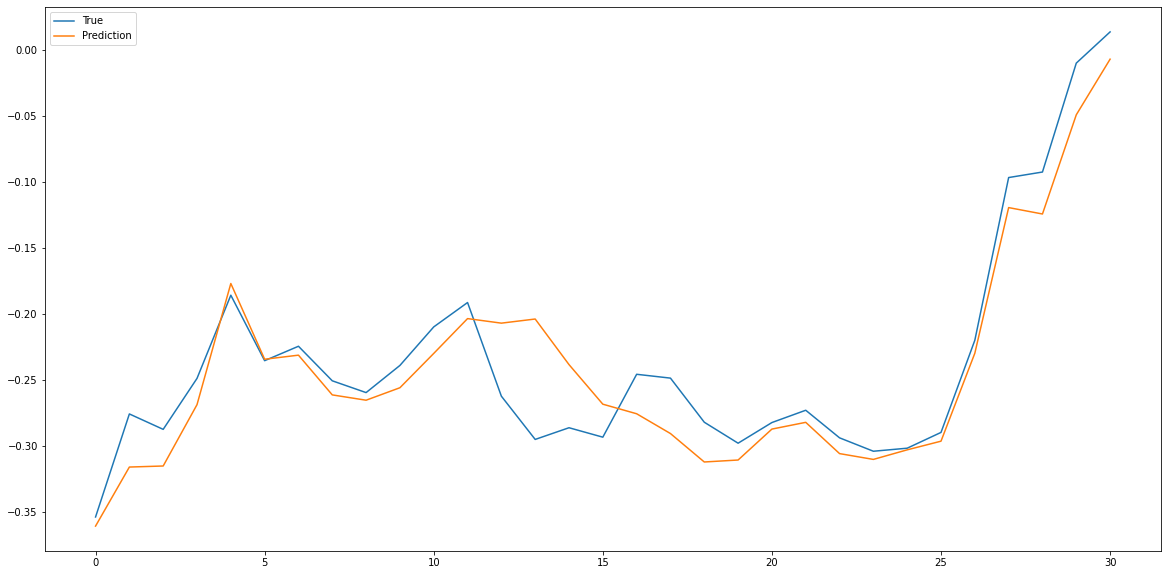

In [10]:
pred = model.predict(x_test)

fig = plt.figure(facecolor ='white', figsize = (20,10))
ax = fig.add_subplot(111)
ax.plot(y_test, label = 'True')
ax.plot(pred, label = 'Prediction')
ax.legend()
plt.show()

In [ ]:
# and that's it for now my friends, check the link in description for mode content. subcribe to 
my newslatetter 